In [29]:
#%autoreload
from trace_utils import *
from plot_utils import *
from bad_eggs import *

In [30]:
from matplotlib import rcParams
rcParams['svg.fonttype'] = 'none'
rcParams['font.family'] = ['Avenir']
rcParams['font.size'] = 20

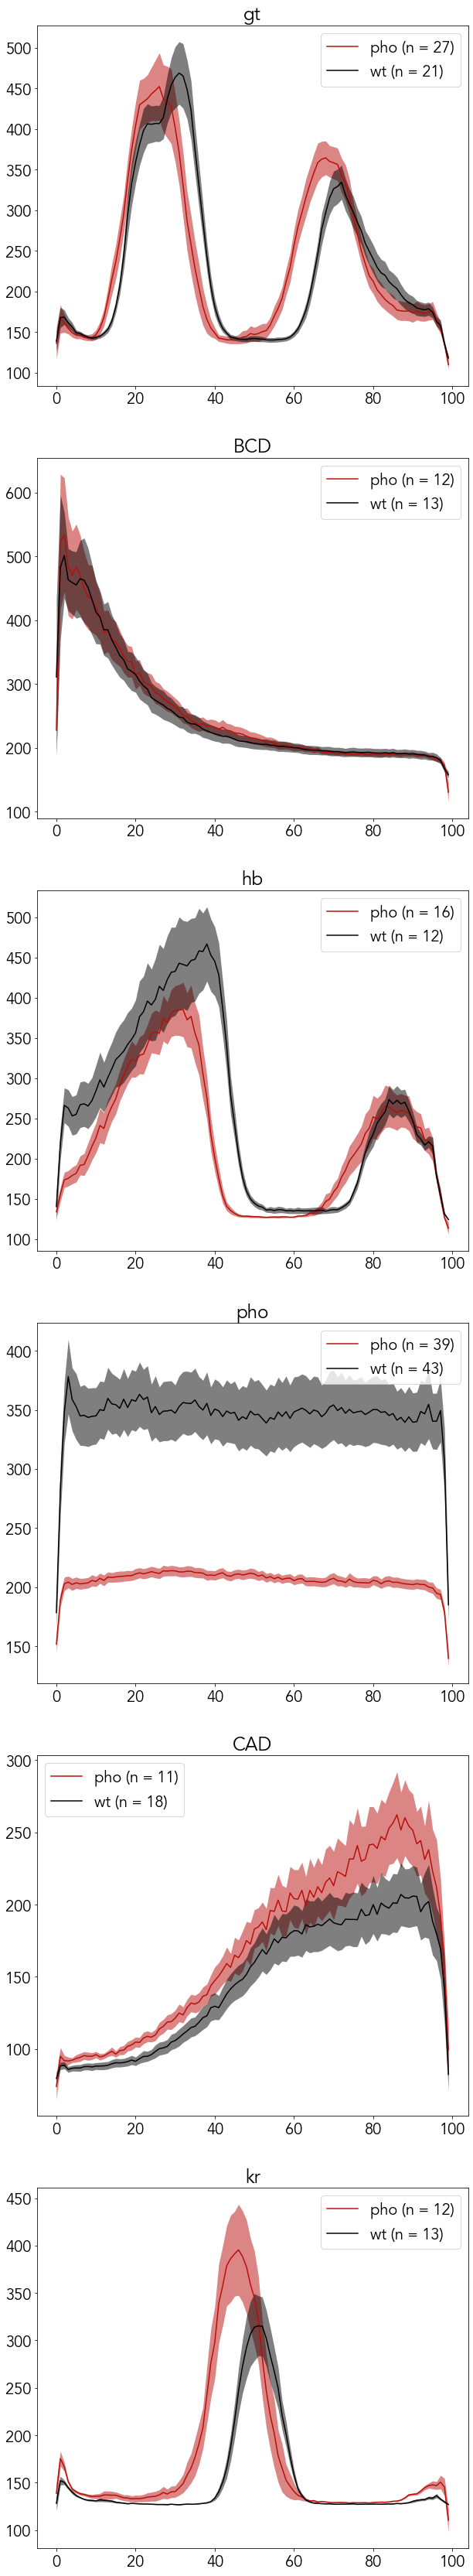

In [31]:
#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces/wt_pho'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

#FORMAT DATASTRUCTURE
all_traces = format_trace_datastructure(traces_list, bad_eggs)

#PLOT
fig = show_all_traces(all_traces)
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_all.svg", format="svg" )

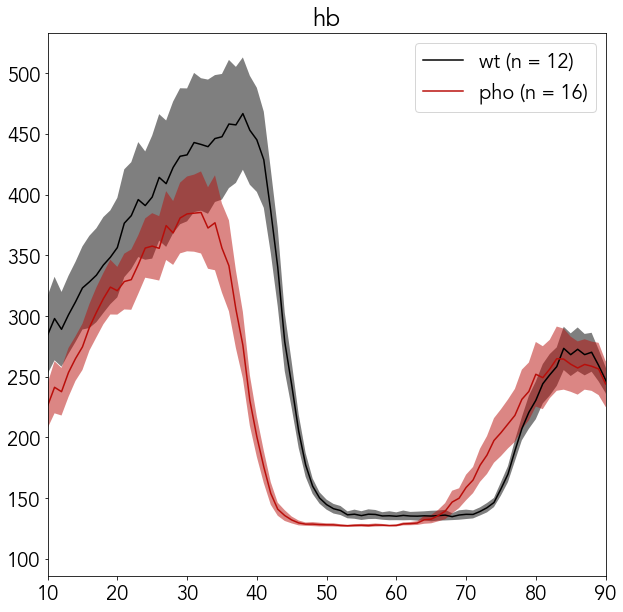

In [9]:
#PLOT
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=['hb'])
plt.xlim([10, 90])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_hb.svg", format="svg" )


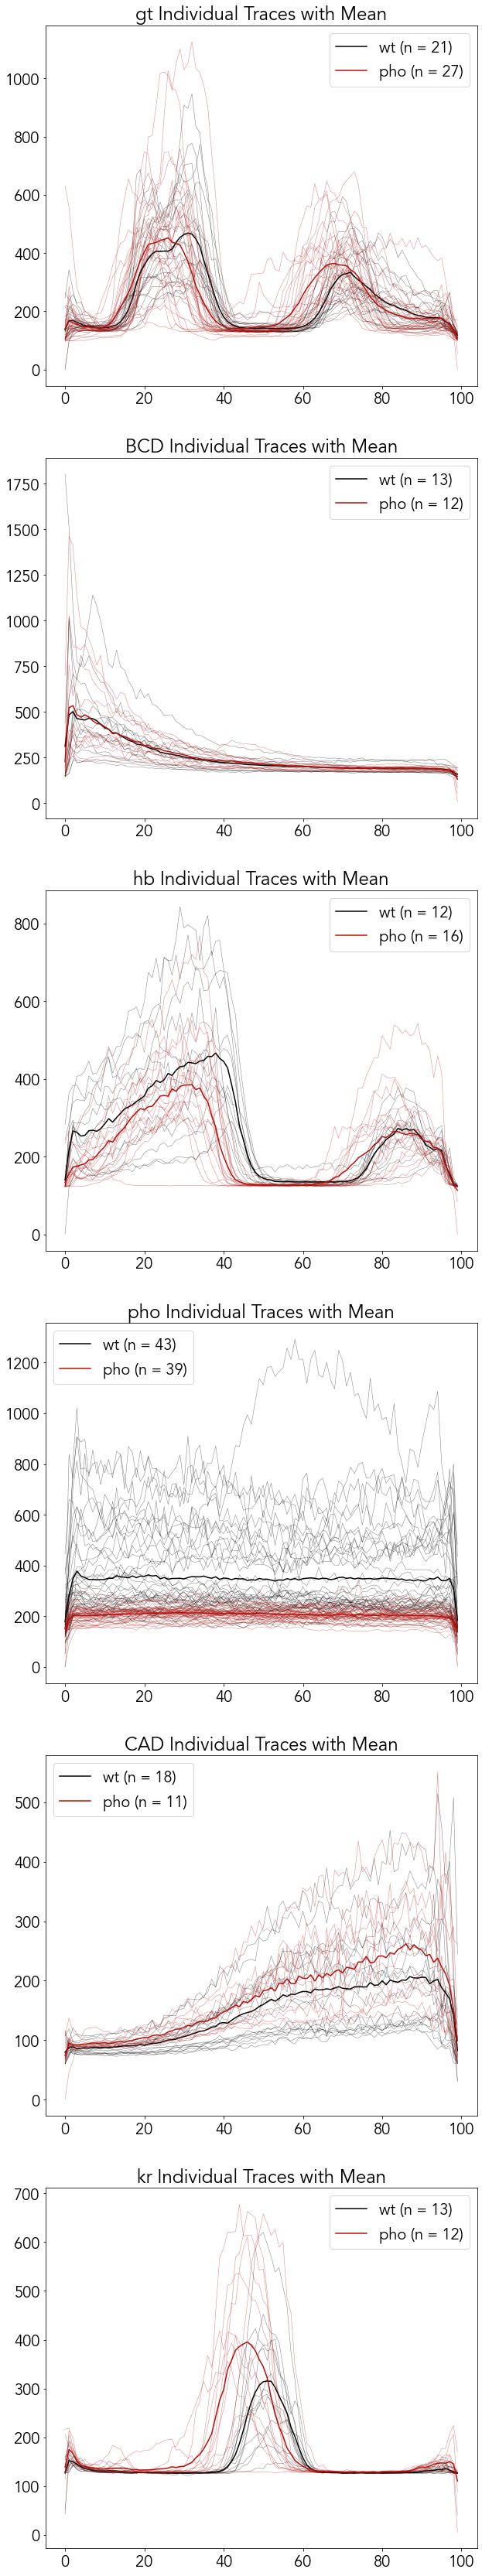

In [32]:
#can list which genes/genotypes you want plotted, or omit/set to None to do all, and optionally display individual traces
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=None, individuals=True) 
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_singletraces.svg", format="svg" )

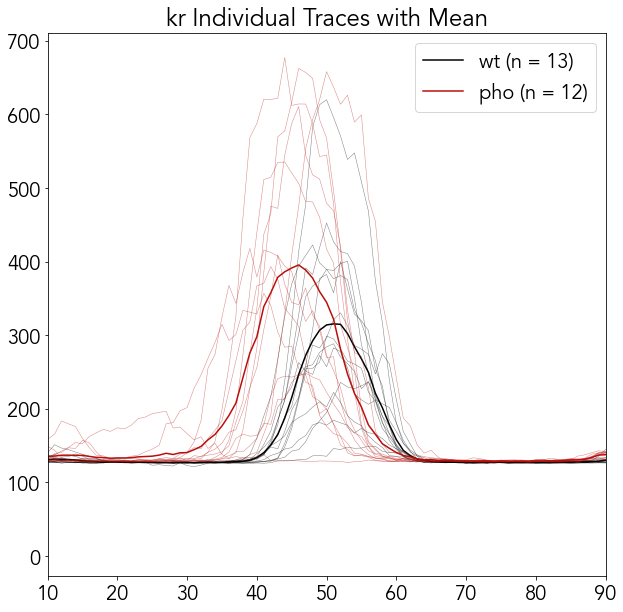

In [12]:
#PLOT
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=['kr'], individuals=True) 
plt.xlim([10, 90])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_singletraces_kr.svg", format="svg" )

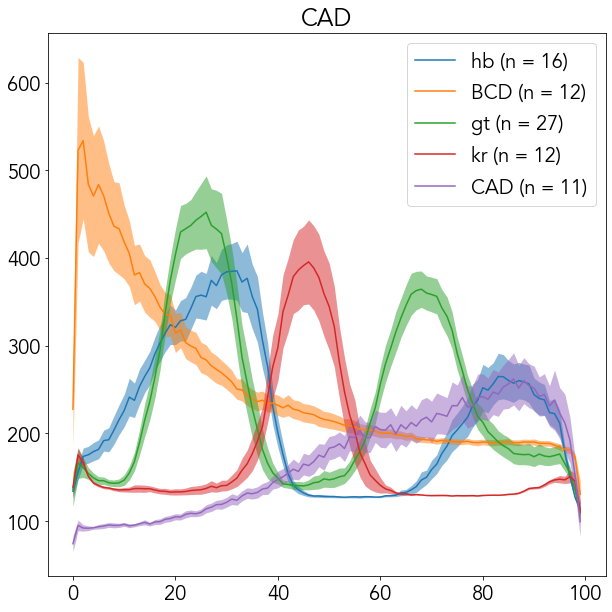

In [26]:
#Plotting all of the genes for a single genotype:
fig = show_genotype_traces(all_traces, 'pho', genes = ['hb', 'BCD', 'gt', 'kr', 'CAD' ])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_pho_embryo.svg", format="svg" )

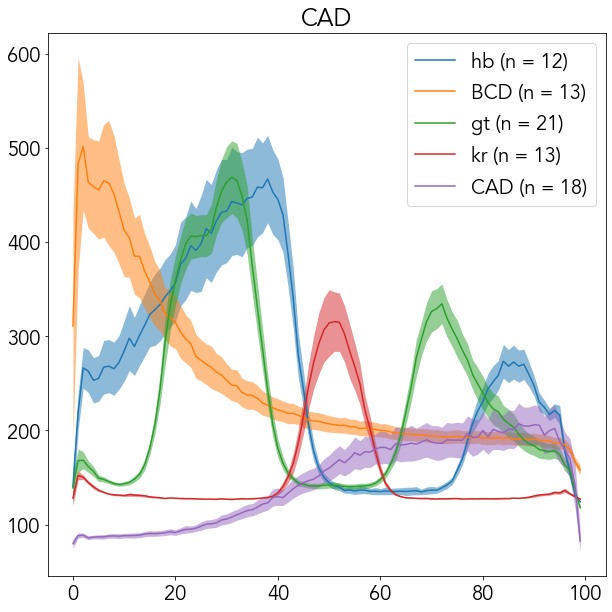

In [27]:
fig = show_genotype_traces(all_traces, 'wt', genes = ['hb', 'BCD', 'gt', 'kr', 'CAD' ])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_wt_embryo.svg", format="svg" )

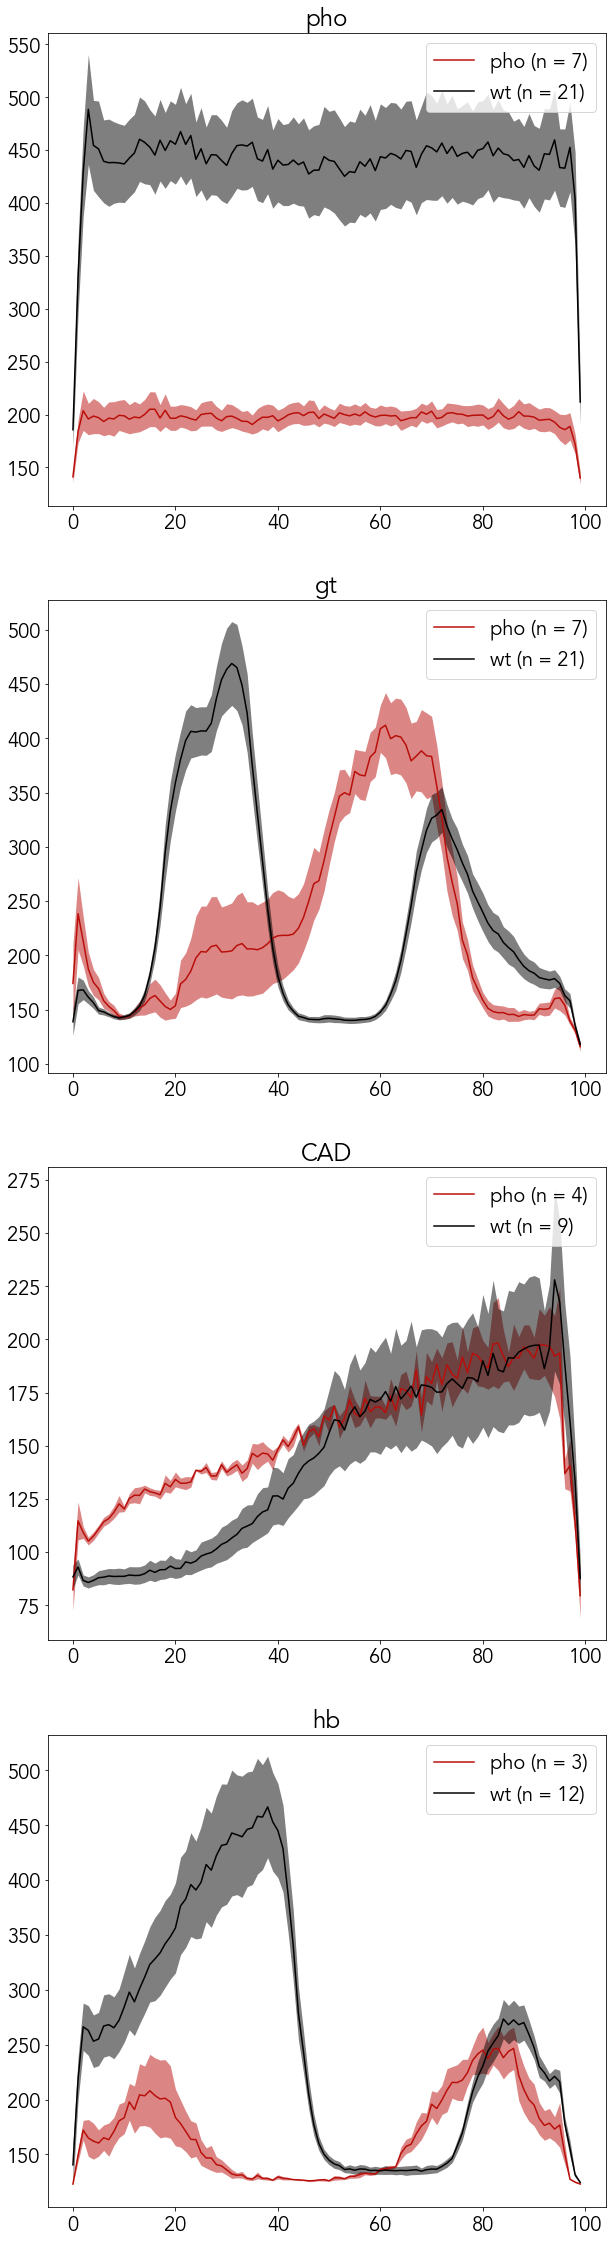

In [14]:
#one stripe of giant only
from xtreme import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces/xtreme_gt'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, xtreme)

fig = show_all_traces(all_traces) 
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_xtreme.svg", format="svg" )


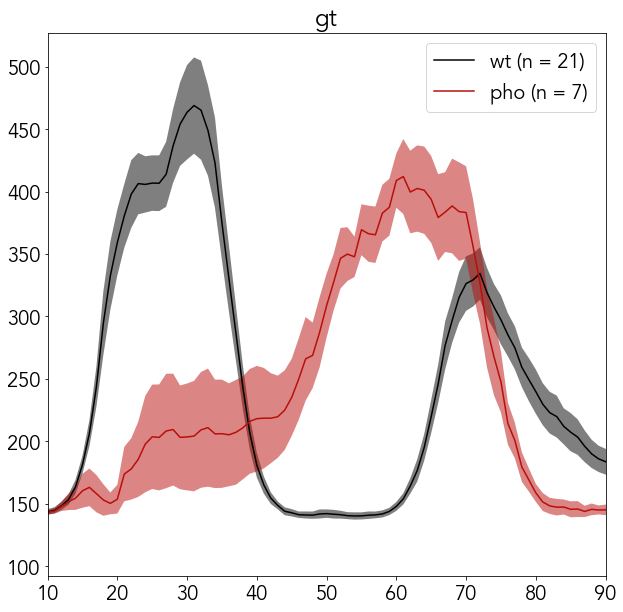

In [19]:
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=['gt'])
plt.xlim([10, 90])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_xtreme_gt.svg", format="svg" )

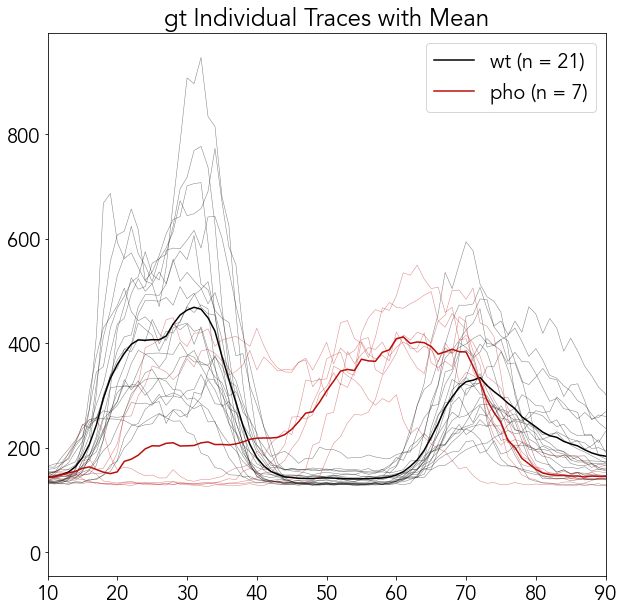

In [20]:
#can list which genes/genotypes you want plotted, or omit/set to None to do all, and optionally display individual traces
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=['gt'], individuals=True) 
plt.xlim([10, 90])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_singletraces_xtreme_gt.svg", format="svg" )

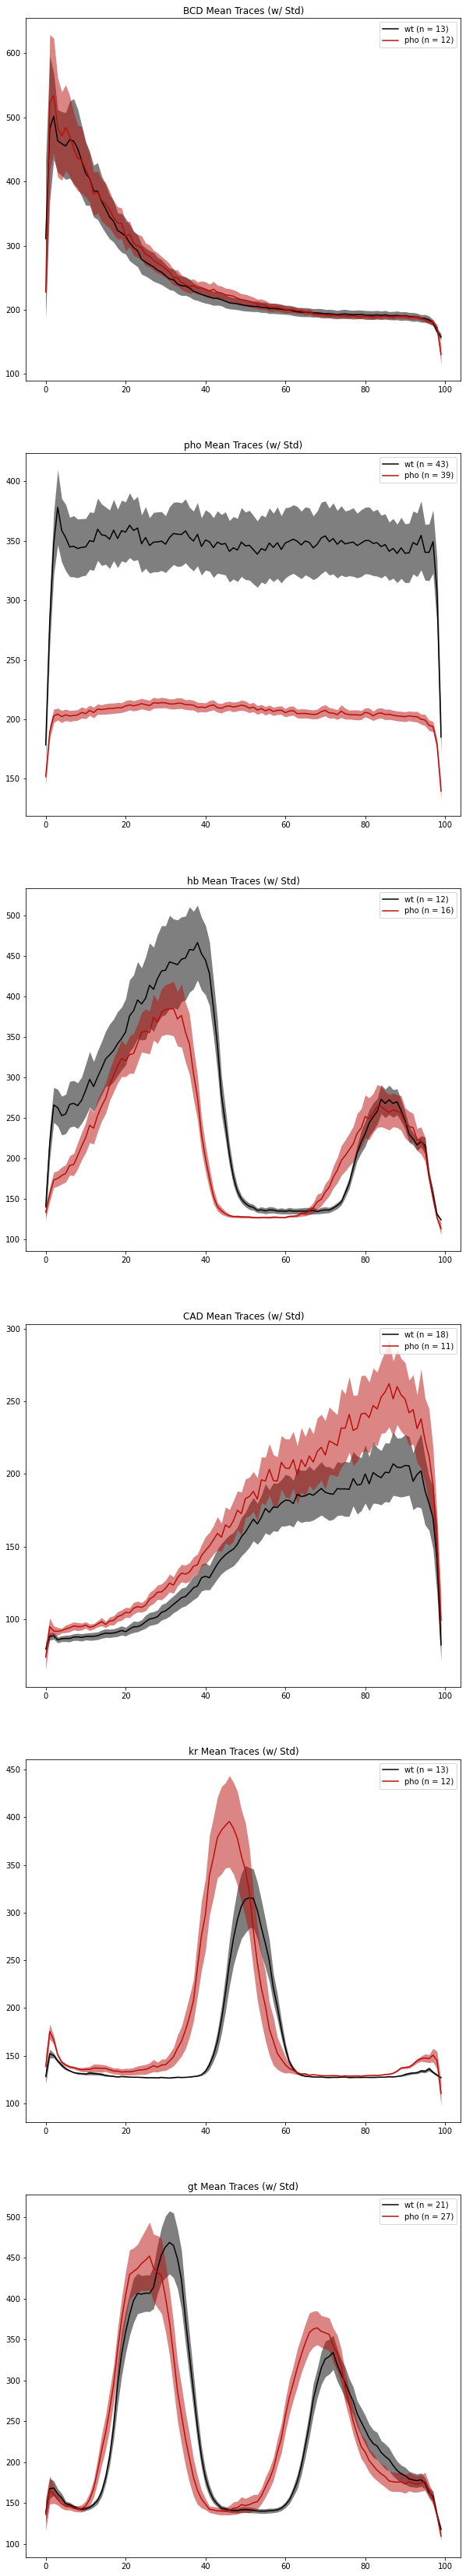

In [29]:
genotypes = list(all_traces.keys())
color_dict = get_color_dict(genotypes)
fig = show_all_traces(all_traces, color_dict=color_dict, genotypes=['wt', 'pho'])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/test.svg", format="svg" )